### File 1
    *Which bird is the most dangerous 1990-2014?
    *Which month of the year has most animal strikes 1990-2014?
    *Which state has the most animal strikes 1990-2015?
    *Which airport has the most animal strikes 1990-2015?

In [31]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy.stats as stats

In [2]:
file_path = 'Data/database.csv'
df = pd.read_csv(file_path, low_memory=False)  #low memory imput to avoid warning message
# df.info()
# column notes:
# Species Quantity values: '1', '2-10', nan, '11-100', 'Over 100' 

In [3]:
subset_df = df[["Incident Year","Incident Month","Airport","Airport ID", "State","Aircraft","Aircraft Type", "Flight Phase", "Species Name","Species ID","Species Quantity"]]
subset_df.to_csv("Data/data_subset.csv")


# Which bird is the most dangerous 1990-2014?

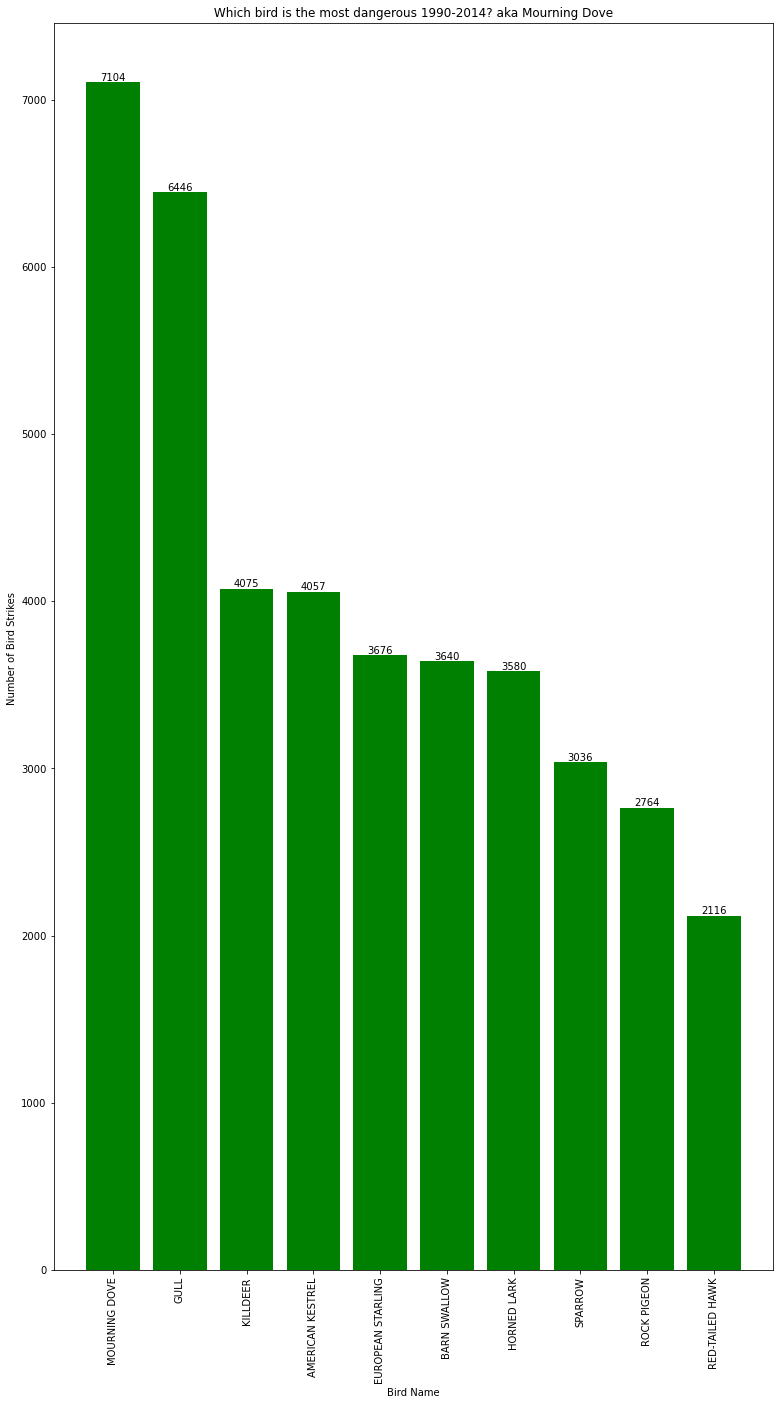

In [4]:
#removing "unknown" bird species, removing partial year data for 2015
birdType_df = subset_df[["Species Name","Species ID","Species Quantity"]].loc[(subset_df["Species Name"]!= "UNKNOWN MEDIUM BIRD") & (subset_df["Species Name"]!= "UNKNOWN SMALL BIRD") 
                                                                              & (subset_df["Species Name"]!= "UNKNOWN LARGE BIRD") & (subset_df["Species Name"]!= "UNKNOWN BIRD")
                                                                              & (subset_df["Incident Year"]!= 2015)]


# todo add labels, pretty up.  add thoughts on results
birdCounts = birdType_df["Species Name"].value_counts()

y_axis = birdCounts[:10]  
x_axis = birdCounts.index[:10]

# plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "green")
plt.tight_layout()  
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,birdCounts.index[:10], rotation="vertical")

plt.xlabel('Bird Name') # Label the x axis 
plt.ylabel("Number of Bird Strikes ")  # Label the y axis
plt.title(" Which bird is the most dangerous 1990-2014? aka Mourning Dove ")

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')


figure = plt.gcf()

figure.set_size_inches(12, 20)

plt.savefig("Images/DangerousMourningDove.png", dpi=500) # TODO The legend and axis names are put in the saved image.

plt.show() 
 

# TODO Add Data Labels and name all axis - DONE 
# Write a observation summary for the graph. 

### Which month of the year has most animal strikes?



In [5]:
# subset_df

In [6]:
numberofthings = df['Species Name'].unique()
len(numberofthings)

716

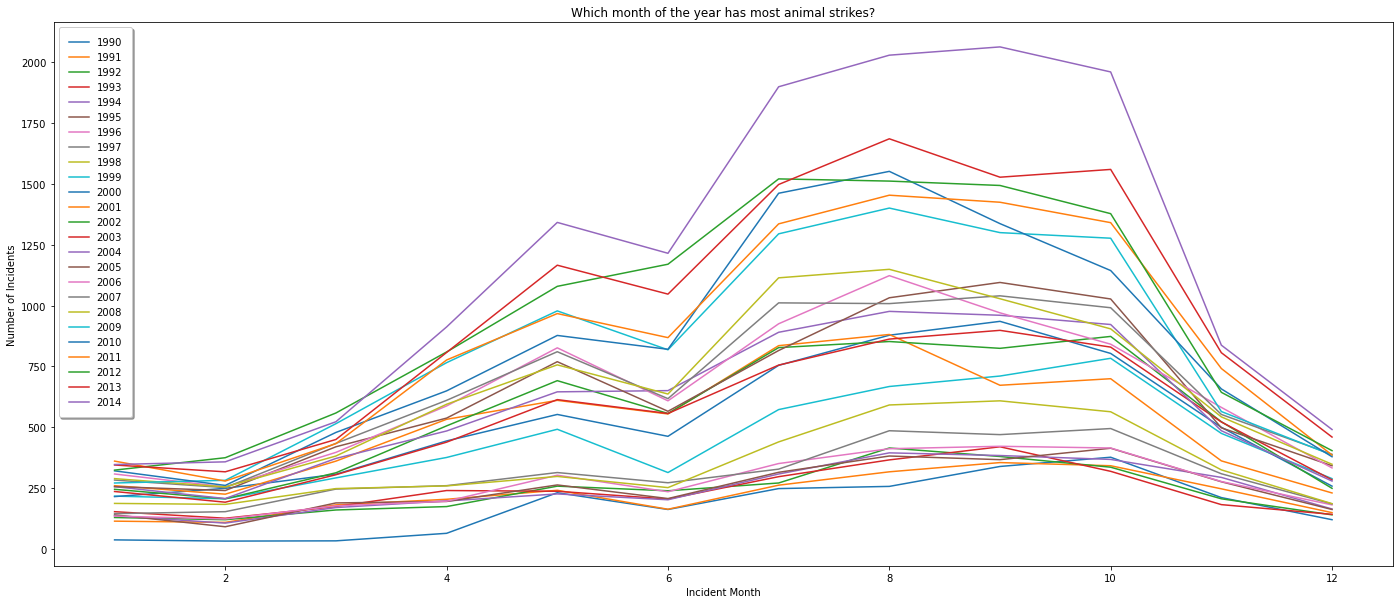

,Incident Year,Incident Month,Species Quantity,Aircraft
0,1990,1,1,B-757-200
1,1990,1,1,DC-9
2,1990,1,1,UNKNOWN
3,1990,1,1,A-10A
4,1990,1,1,F-16


In [44]:
#### Which month of the year has most animal strikes?  - Jag 

#removing "unknown" bird species, removing partial year data for 2015
monthType_df = subset_df[["Incident Year","Incident Month","Species Quantity","Aircraft"]].loc[(subset_df["Incident Year"]!= 2015)]


# todo add labels, pretty up.  add thoughts on results

fig, ax = plt.subplots(figsize=(24,10))
ax.set_xlabel('Months (1-12)')
ax.set_ylabel('Number of Incidents')
monthType_df.groupby(['Incident Month','Incident Year']).count()['Aircraft'].unstack().plot(ax=ax,title= 'Which month of the year has most animal strikes?' )         
plt.savefig("Images/AugustReallySucks.png", dpi=500) # TODO The legend and axis names are put in the saved image.
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()
monthType_df.head()

In [43]:
grouped_month = monthType_df.groupby(['Incident Month']).count()
grouped_month_count = grouped_month['Incident Year'].to_frame().reset_index().rename(columns={"Incident Year":"Count"})
grouped_month_count['Expected']=len(monthType_df['Incident Year'])/12


grouped_month_count
#stats.chisquare(grouped_month_count['Count'], grouped_month_count['Expected'])

,Incident Month,Count,Expected
0,1,5685,13663.0
1,2,5177,13663.0
2,3,8095,13663.0
3,4,11603,13663.0
4,5,15534,13663.0
5,6,13383,13663.0
6,7,20321,13663.0
7,8,22676,13663.0
8,9,22017,13663.0
9,10,20954,13663.0


In [58]:
bins = [0, 3, 6, 9, 12]
bin_labels = ['Winter', 'Spring', 'Summer', 'Fall']
binned_df=pd.cut(monthType_df["Incident Month"], bins, labels=bin_labels)
binned_df
monthType_df['Season']=binned_df
monthType_df['Counter']=1

# Winter_df = monthType_df[["Season","Counter"]].loc[(monthType_df["Season"] == "Winter")]
# Spring_df = monthType_df[["Season","Counter"]].loc[(monthType_df["Season"] == "Spring")]
# Summer_df = monthType_df[["Season","Counter"]].loc[(monthType_df["Season"] == "Summer")]
# Fall_df = monthType_df[["Season","Counter"]].loc[(monthType_df["Season"] == "Fall")]
monthType_df
grouped_season = monthType_df.groupby(['Season']).count().reset_index()

grouped_season['Expected']=len(monthType_df['Counter'])/4
grouped_season

,Season,Incident Year,Incident Month,Species Quantity,Aircraft,Counter,Expected
0,Winter,18957,18957,18496,18957,18957,40989.0
1,Spring,40520,40520,39450,40520,40520,40989.0
2,Summer,65014,65014,63197,65014,65014,40989.0
3,Fall,39465,39465,38500,39465,39465,40989.0


In [59]:
#Chi Square test
stats.chisquare(grouped_season['Counter'], grouped_season['Expected'])

Power_divergenceResult(statistic=25986.293542169853, pvalue=0.0)

In [60]:
Spring_Fall=grouped_season.loc[(grouped_season['Season']=='Spring') | (grouped_season['Season']=='Fall')]
stats.chisquare(Spring_Fall['Counter'], Spring_Fall['Expected'])

Power_divergenceResult(statistic=62.02973968625729, pvalue=3.3830923922013147e-15)

In [ ]:
#Null Hypothesis: All months have the same number of strikes; All seasons have the same number of strikes
#The Chi Square tests showed that there was a statistically significant difference between the number of animal strikes per month (p=0.0)
#The Chi Square tests showed that there was a statistically significant difference between the number of animal strikes per season (p=0.0)

In [ ]:
# January = grouped_month_count[grouped_month_count["Incident Month"] ==1]['Count']
# February = grouped_month_count[grouped_month_count["Incident Month"] ==2]['Count']
# March = grouped_month_count[grouped_month_count["Incident Month"] ==3]['Count']
# April = grouped_month_count[grouped_month_count["Incident Month"] ==4]['Count']
# May = grouped_month_count[grouped_month_count["Incident Month"] ==5]['Count']
# June = grouped_month_count[grouped_month_count["Incident Month"] ==6]['Count']
# July = grouped_month_count[grouped_month_count["Incident Month"] ==7]['Count']
# August = grouped_month_count[grouped_month_count["Incident Month"] ==8]['Count']
# September = grouped_month_count[grouped_month_count["Incident Month"] ==9]['Count']
# October = grouped_month_count[grouped_month_count["Incident Month"] ==10]['Count']
# November = grouped_month_count[grouped_month_count["Incident Month"] ==11]['Count']
# December = grouped_month_count[grouped_month_count["Incident Month"] ==12]['Count']
# grouped_month_count

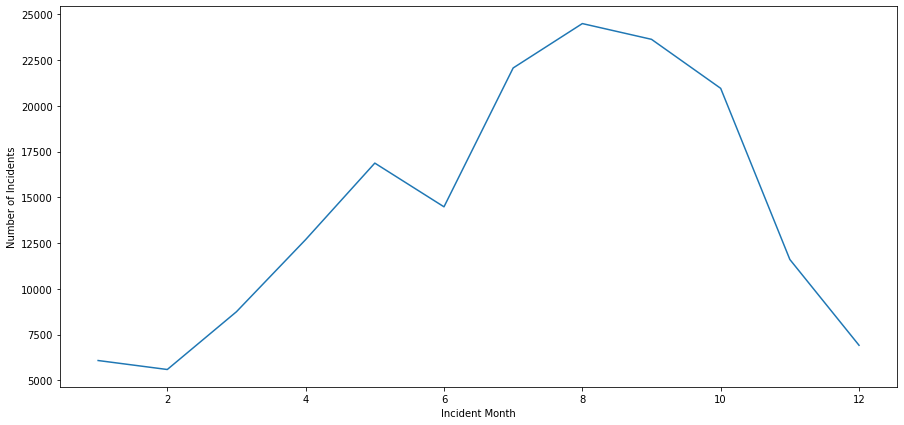

In [8]:
#jag
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('Months (1-12)')
ax.set_ylabel('Number of Incidents')
df.groupby(['Incident Month']).count()['Aircraft'].plot(ax=ax)
plt.show()
#Add a grid to make it obvious Aug is the most dangerous month 

In [9]:
#jag

In [10]:
#jag <DO NOT CODE ABOVE THIS LINE> 

In [11]:
# Which airport or geographic area is more likely to crash? - Molly (try a stacked graph) 




In [12]:
state_df = subset_df.groupby(['State'], as_index='True')
state_grouping_count = pd.DataFrame(state_df['Incident Year'].count())
state_grouping_count = state_grouping_count.sort_values('Incident Year', ascending = False)
state_grouping_count

,Incident Year
State,
TX,14854
CA,13187
FL,10604
NY,9043
IL,7465
...,...
AB,47
MB,14
NL,7


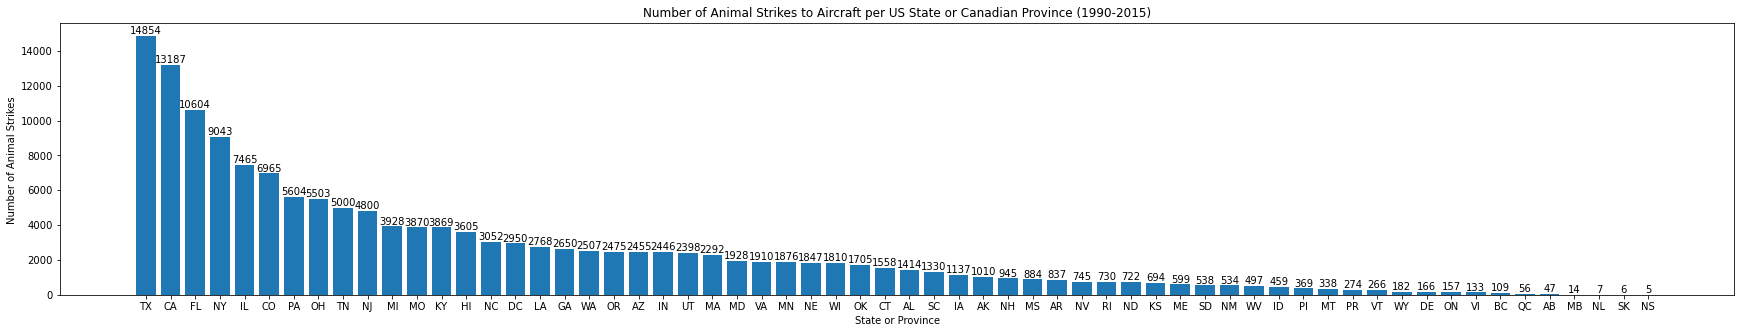

In [13]:
x_axis = state_grouping_count.index
y_axis = state_grouping_count['Incident Year']

plt.figure(figsize=(30,5))
plt.bar(x_axis, y_axis)
plt.xlabel('State or Province') # Label the x axis 
plt.ylabel("Number of Animal Strikes ")  # Label the y axis
plt.title("Number of Animal Strikes to Aircraft per US State or Canadian Province (1990-2015)")

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')
    
plt.savefig("Images/StrikesPerStateNA.png", dpi=500) # TODO The legend and axis names are put in the saved image.

plt.show()

#Which state or province led to the most animal strikes by aircraft between 1990 and 2015?
#Texas, California, and Florida were the three states that reported the most animal strikes reporting over 10,000 strikes each.
#Nova Scotia, Saskatchewan, and Newfoundland and Labaroador were the three providences that reported the fewest
#animal strikes with fewer than ten strikes each.

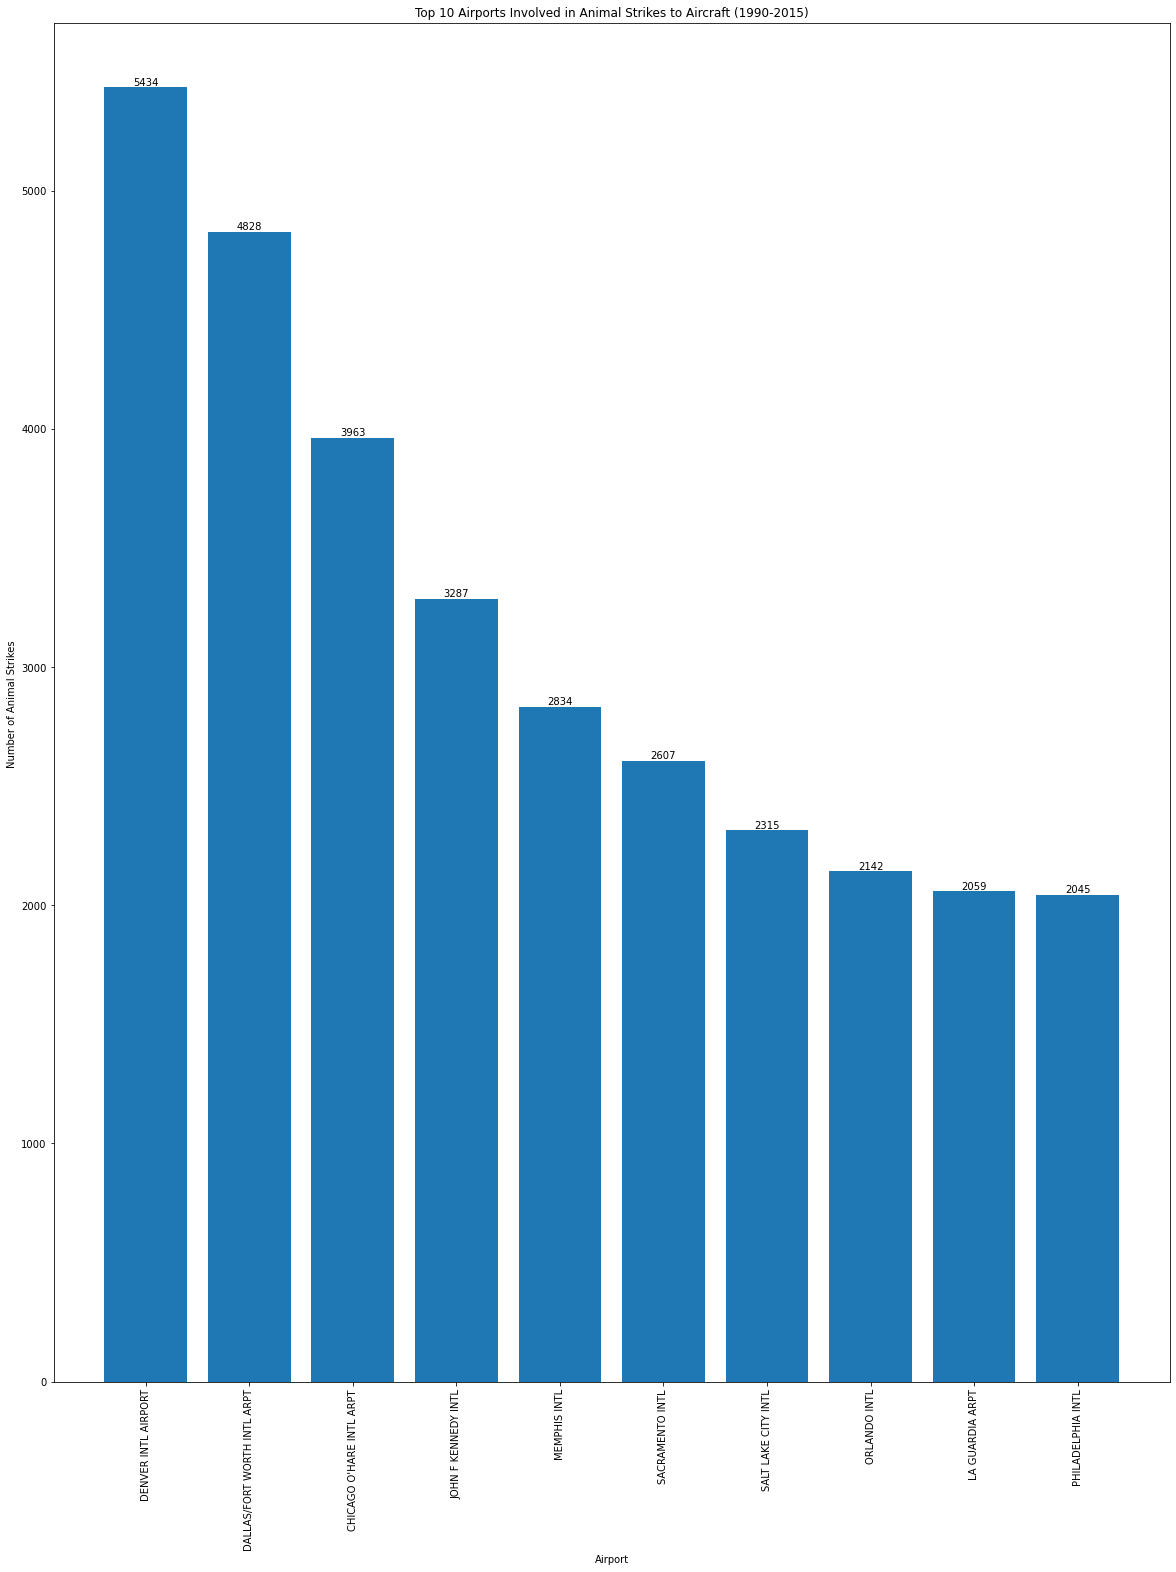

In [14]:
airport_df = subset_df.loc[subset_df['Airport'] != 'UNKNOWN', :]
airport_grouping_count = airport_df.groupby(['Airport']).count().sort_values('Incident Year', ascending = False)
airport_grouping_count.head()

x_axis = airport_grouping_count.index[:10]
y_axis = airport_grouping_count['Incident Year'][:10]

plt.figure(figsize=(20,25))
plt.bar(x_axis, y_axis)
plt.xlabel('Airport') # Label the x axis 
plt.ylabel("Number of Animal Strikes ")  # Label the y axis
plt.title("Top 10 Airports Involved in Animal Strikes to Aircraft (1990-2015)")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_axis, rotation="vertical")

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')
    
plt.savefig("Images/Top10AirportsNA.png", dpi=1000) # TODO The legend and axis names are put in the saved image.
plt.show()
#Which airports reported the most animal strikes between 1990 and 2015?
#The top ten airports involved in animal strikes during these 25 years were Denver International, Dallas/Fort Worth
#International, O'Hare, JFK, Memphis International, Sacremento International, Salt Lake City International, Orlando International,
#La Guardia, and Philedelphia International reporting between 2045-5434 airstrikes per airport.

In [15]:
# Molly ^^^